# Student Performance Indicator
#### Life cycle of Machine Learning Project
- Understanding the Problem Statment
- Data Collection
- Data Checks
- Exploratory Data Analysis(EDA)
- Data Pre-Processing
- Model Training
- Choose the best model



#### Problem Statment
- This project understands how the student's performance (test score) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course
#### Data Collection
- Dataset Source:  https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 coloumn and 1000 rows


#### Importing data and required packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/stud.csv')

#### Show Top 5 Records

In [ ]:
df.head(5)

#### Shape of the dataset

In [ ]:
df.shape

#### Dataset Information
- Gender: sex of student (Male/Female)
- Race/Ethnicity: ethnicity of the student (Group A, B, C, D, E)
- Parental level of education: parents' final education (bachelor's degree, some college, master's degree, associate's degree, high school)
- Lunch: having lunch before test (standard or free/reduced)
- test preparation course: complete or not complete before test
- math score
- reading score
- writing score

#### Check Missing Values and duplicates

In [ ]:
df.isna().sum()

In [ ]:
df.duplicated().sum()

#### **There are no missing values and duplicates in the dataset**

#### Check data types

In [ ]:
df.dtypes

#### Check the number of unique values of each coloumn

In [ ]:
df.nunique()

#### Cheeck the statistics of data set

In [ ]:
df.describe()

### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

### Exploring Data

In [ ]:
print("Categories in 'gender' variable:", end="")
print(df['gender'].unique())

print("Categories in 'race ethnicity' variable:", end="")
print(df['race_ethnicity'].unique())

print("Categories in 'parental level of education' variable:", end="")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:", end="")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:", end="")
print(df['test_preparation_course'].unique())

In [ ]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

#### Adding columns for 'Total Score' and 'Average'

In [ ]:
df['total_score']=df['math_score'] + df['reading_score'] + df['writing_score']
df['average']=df['total_score']/3
df.head()

In [ ]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

In [ ]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

#### Insights
- From the above values we get students have performed the worst in Maths
- Best performance is in reading section

### Exploring Data (Visualization)
#### Visualize average score distribution to make sone conclusion
- Histogram
- Kernel Distribution Estimation(KDE)

#### Histogram and KDE

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

#### Insight
- Female students tend to perform well than male students

In [ ]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

#### Insight
- Standard lunch helps students perform well in exams
- Standard lunch helps both male and female students perform better in exam

In [ ]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
plt.title('Math Scores')
ax=sns.violinplot(y='math_score',data=df,color='red',linewidth=2)
plt.subplot(132)
plt.title('Reading Scores')
ax=sns.violinplot(y='reading_score',data=df,color='green',linewidth=2)
plt.subplot(133)
plt.title('Writing Scores')
ax=sns.violinplot(y='writing_score',data=df,color='blue',linewidth=2)
plt.show()


#### Insight 
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

##### Multivariant analysis using pie plot

In [ ]:
plt.rcParams['figure.figsize']= (30,20)

plt.subplot(151)
size= df['gender'].value_counts()
labels ='Female','Male'
color=['red', 'green']
plt.pie(size,colors=color,labels=labels,autopct='%2.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')   

plt.subplot(152)
size=df['race_ethnicity'].value_counts()
labels='Group C', 'Group D','Group B','Group E','Group A'
color=['red','green','blue','cyan','orange']
plt.pie(size,colors=color,labels=labels, autopct='%2.2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(153)
size=df['lunch'].value_counts()
labels='Standard','Free'
color=['red','green']
plt.pie(size,colors=color,labels=labels, autopct='%2.2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

plt.subplot(154)
size=df['test_preparation_course'].value_counts()
labels='None','Completed'
color=['red','green']
plt.pie(size,colors=color,labels=labels, autopct='%2.2f%%')
plt.title('Test Course', fontsize=20)
plt.axis('off')

plt.subplot(155)
size=df['parental_level_of_education'].value_counts()
labels='Some College',"Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree" 
color=['red','green','blue','cyan','orange','grey']
plt.pie(size,colors=color,labels=labels, autopct='%2.2f%%')
plt.title('Parental Education', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()


##### Insights
- Number of Male and Female students is almost equal
- Number of students are greatest in Group C
- Number of studnets who have standard lunch are greater 
- Number of students who have not enrolled in any test preparation course in greater 
- Number of students whoes parental education is 'Some College' is greater followed closely by 'Associate's Degree'

##### Bivariant Analysis (Does Race/Ethnicity have any impact on student's performance?)

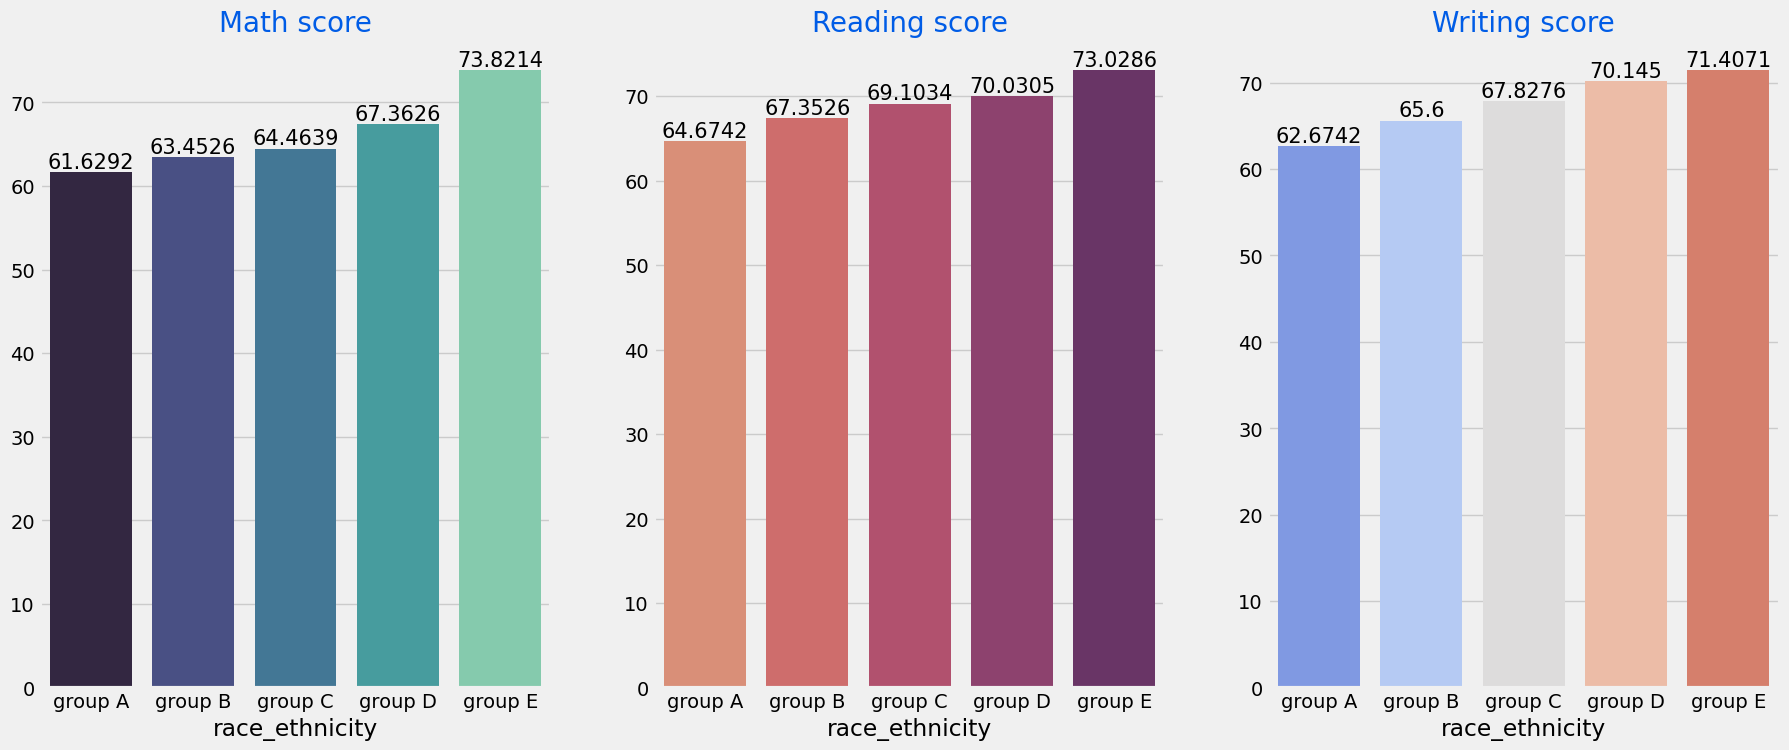

In [151]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights
- Group E students have scored the highest marks in all three subjects
- Group A students have scored the lowerst marks
- Students from lower socio-economic status have a lower average in all subjects